In [1]:
%matplotlib inline
from vic.dataloader import load_orl, make_fixed_test_indices
from vic.models import LBPH
from vic.metrics import get_metrics_vs_train_size
from vic.transform import transform_test_set
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = load_orl("../data/ORL")
max_idx = max(data.keys())
min_length = min(len(images) for images in data.values())
print(
    f"Loaded ORL dataset with {max_idx} subjects with at least {min_length} images each."
)

Loaded ORL dataset with 40 subjects with at least 10 images each.


In [3]:
model = LBPH()
n_test = 3
train_sizes = np.arange(1, min_length - n_test + 1)
test_idx, pool_idx = make_fixed_test_indices(data, n_test=n_test, seed=0)

In [4]:
new_data, new_test_idx = transform_test_set(
    data, test_idx, operation="rotate", angle=45
)
accuracy_scores, conf_matrices = get_metrics_vs_train_size(
    model, train_sizes, new_data, new_test_idx, pool_idx, seed=0
)

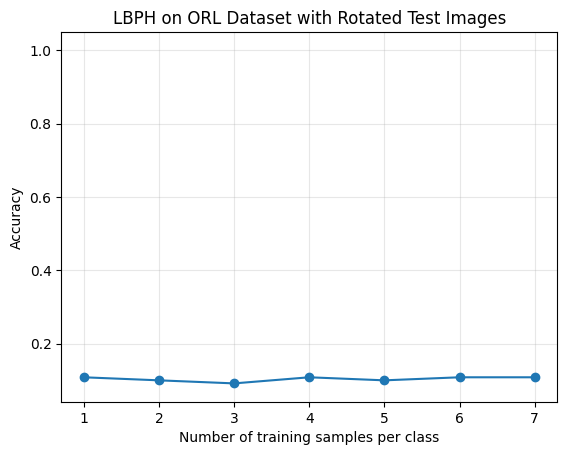

In [5]:
fig = plt.figure()
plt.plot(train_sizes, accuracy_scores.values(), marker="o")
plt.title("LBPH on ORL Dataset with Rotated Test Images")
plt.xlabel("Number of training samples per class")
plt.ylabel("Accuracy")
plt.xticks(train_sizes)
plt.grid(True, alpha=0.3)
plt.ylim(min(accuracy_scores.values()) - 0.05, 1.05)
plt.show()

In [6]:
new_data, new_test_idx = transform_test_set(
    data, test_idx, operation="blur", blur_std=10
)
accuracy_scores, conf_matrices = get_metrics_vs_train_size(
    model, train_sizes, new_data, new_test_idx, pool_idx, seed=0
)

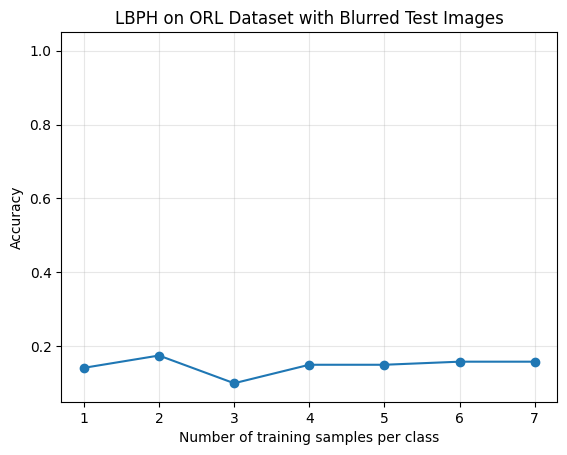

In [7]:
fig = plt.figure()
plt.plot(train_sizes, accuracy_scores.values(), marker="o")
plt.title("LBPH on ORL Dataset with Blurred Test Images")
plt.xlabel("Number of training samples per class")
plt.ylabel("Accuracy")
plt.xticks(train_sizes)
plt.grid(True, alpha=0.3)
plt.ylim(min(accuracy_scores.values()) - 0.05, 1.05)
plt.show()